In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, recall_score, f1_score, accuracy_score

Generate single molecule spectra for model training

In [12]:
k = np.arange(900, 1800, 5)

In [22]:
sig=100

In [23]:
a=[]

for i in range(100):
    a.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*(1+(np.random.rand()-0.5)*2*0.1) ) 

A = pd.DataFrame(np.column_stack((k, *a)))

In [24]:
b=[]

for i in range(100):
    b.append( norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*(2+(np.random.rand()-0.5)*2*0.1) ) 

B = pd.DataFrame(np.column_stack((k, *b)))

In [25]:
c=[]

for i in range(100):
    c.append( norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*(3+(np.random.rand()-0.5)*2*0.1) ) 

C = pd.DataFrame(np.column_stack((k, *c)))

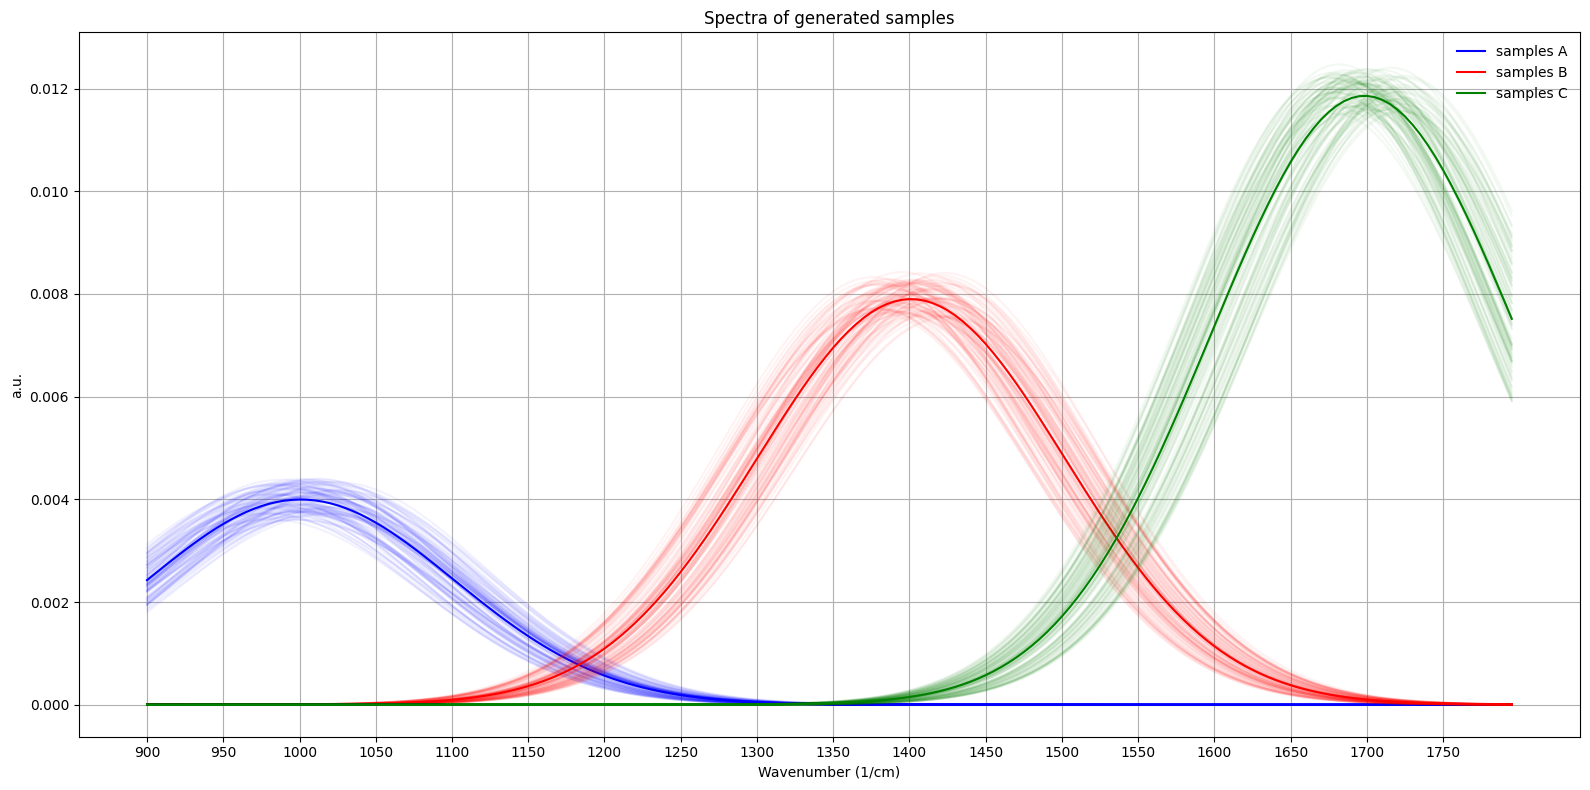

In [26]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
A_plot = pd.melt(A, [0])
for sample, measurement in A_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="blue")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="blue", label="samples A", legend=True
)
###
sample_measurement = []
B_plot = pd.melt(B, [0])
for sample, measurement in B_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="red")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="red", label="samples B", legend=True
)
###
sample_measurement = []
C_plot = pd.melt(C, [0])
for sample, measurement in C_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="green")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="green", label="samples C", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [27]:
A = A.set_index([0])
A.index.names = ['Wavenumbers']
A.columns = ['A_'+str(col) for col in A.columns]

B = B.set_index([0])
B.index.names = ['Wavenumbers']
B.columns = ['B_'+str(col) for col in B.columns]

C = C.set_index([0])
C.index.names = ['Wavenumbers']
C.columns = ['C_'+str(col) for col in C.columns]

df0 = pd.concat([A,B,C], axis=1)

In [28]:
df0

,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,...,C_91,C_92,C_93,C_94,C_95,C_96,C_97,C_98,C_99,C_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,2.196361e-03,2.312591e-03,2.903504e-03,2.167533e-03,2.951864e-03,2.857346e-03,2.856553e-03,2.486827e-03,2.842506e-03,2.534527e-03,...,1.037527e-16,3.667957e-16,2.528867e-16,2.810307e-17,2.181372e-16,3.956038e-17,1.873184e-16,2.711747e-16,2.809596e-17,6.689679e-16
905.0,2.310941e-03,2.444929e-03,3.033189e-03,2.287822e-03,3.061841e-03,2.966365e-03,2.964039e-03,2.619326e-03,2.966828e-03,2.666766e-03,...,1.552619e-16,5.451171e-16,3.756986e-16,4.231014e-17,3.252457e-16,5.921098e-17,2.790860e-16,4.020924e-16,4.242036e-17,9.898065e-16
910.0,2.425491e-03,2.578314e-03,3.160649e-03,2.408646e-03,3.168037e-03,3.071954e-03,3.067919e-03,2.751858e-03,3.088961e-03,2.798776e-03,...,2.317583e-16,8.080767e-16,5.567560e-16,6.354019e-17,4.837170e-16,8.840549e-17,4.147661e-16,5.947351e-16,6.388590e-17,1.460821e-15
915.0,2.539432e-03,2.712112e-03,3.285130e-03,2.529404e-03,3.269785e-03,3.173462e-03,3.167539e-03,2.883731e-03,3.208200e-03,2.929859e-03,...,3.450724e-16,1.194847e-15,8.230044e-16,9.518441e-17,7.175779e-16,1.316714e-16,6.148597e-16,8.774905e-16,9.597009e-17,2.150531e-15
920.0,2.652159e-03,2.845650e-03,3.405873e-03,2.649463e-03,3.366429e-03,3.270245e-03,3.262258e-03,3.014227e-03,3.323835e-03,3.059289e-03,...,5.124951e-16,1.762257e-15,1.213532e-15,1.422317e-16,1.061805e-15,1.956314e-16,9.091940e-16,1.291464e-15,1.438027e-16,3.157882e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,7.150026e-16,7.563379e-16,1.072324e-16,4.049282e-16,6.720358e-17,9.705137e-17,6.210522e-17,3.001304e-16,2.519603e-16,2.815649e-16,...,9.428822e-03,7.653079e-03,8.330396e-03,1.000252e-02,8.298818e-03,1.082449e-02,8.789623e-03,8.820823e-03,1.039987e-02,7.579781e-03
1780.0,4.880176e-16,5.137603e-16,7.190068e-17,2.737450e-16,4.513473e-17,6.542405e-17,4.167344e-17,2.023113e-16,1.708049e-16,1.898176e-16,...,9.074474e-03,7.292718e-03,7.982748e-03,9.719258e-03,7.936620e-03,1.054864e-02,8.432663e-03,8.467972e-03,1.008076e-02,7.204515e-03
1785.0,3.322686e-16,3.481026e-16,4.808833e-17,1.845903e-16,3.023783e-17,4.399482e-17,2.789388e-17,1.360263e-16,1.155041e-16,1.276408e-16,...,8.711442e-03,6.931700e-03,7.630465e-03,9.420422e-03,7.570993e-03,1.025465e-02,8.069877e-03,8.109065e-03,9.746732e-03,6.830534e-03


In [30]:
labels_train = pd.DataFrame(df0.columns).rename(columns={0:'sample'})
labels_train.loc[labels_train['sample'].str.contains('A'),'target'] = 'A'
labels_train.loc[labels_train['sample'].str.contains('B'),'target'] = 'B'
labels_train.loc[labels_train['sample'].str.contains('C'),'target'] = 'C'
labels_train = labels_train.set_index('sample')
labels_train


,target
sample,
A_1,A
A_2,A
A_3,A
A_4,A
A_5,A
...,...
C_96,C
C_97,C
C_98,C


Generate mixed molecule spectra for testing the model

In [31]:
F=[]
abc=[]

for i in range(100):
    Fa=(1+(np.random.rand()-0.5)*2*1)
    Fb=(2+(np.random.rand()-0.5)*2*2)
    Fc=(3+(np.random.rand()-0.5)*2*3)

    

    abc.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*Fa + \
                norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*Fb + \
                norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*Fc)

    F.append([Fa/1.,Fb/2.,Fc/3.])
    
    

In [32]:
ABC = pd.DataFrame(np.column_stack((k, *abc))).set_index([0])
ABC.index.names = ['Wavenumbers']
ABC.columns = ['ABC_'+str(col) for col in ABC.columns]

In [33]:
ABC

,ABC_1,ABC_2,ABC_3,ABC_4,ABC_5,ABC_6,ABC_7,ABC_8,ABC_9,ABC_10,...,ABC_91,ABC_92,ABC_93,ABC_94,ABC_95,ABC_96,ABC_97,ABC_98,ABC_99,ABC_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,0.003614,0.002176,0.001738,0.003847,0.004416,0.001277,0.000505,0.002298,0.000588,0.002758,...,0.001764,0.001137,0.001855,0.002597,0.000681,0.003081,0.004202,0.001160,0.003414,0.005567
905.0,0.003790,0.002275,0.001842,0.004013,0.004650,0.001330,0.000524,0.002418,0.000622,0.002915,...,0.001831,0.001205,0.001936,0.002760,0.000710,0.003221,0.004375,0.001206,0.003620,0.005791
910.0,0.003965,0.002373,0.001947,0.004176,0.004884,0.001383,0.000543,0.002538,0.000657,0.003074,...,0.001896,0.001274,0.002016,0.002926,0.000738,0.003359,0.004544,0.001250,0.003829,0.006009
915.0,0.004137,0.002469,0.002053,0.004334,0.005117,0.001434,0.000561,0.002657,0.000692,0.003233,...,0.001959,0.001343,0.002095,0.003094,0.000765,0.003494,0.004708,0.001292,0.004040,0.006219
920.0,0.004306,0.002562,0.002159,0.004487,0.005347,0.001483,0.000578,0.002775,0.000727,0.003392,...,0.002018,0.001412,0.002171,0.003264,0.000792,0.003625,0.004865,0.001332,0.004252,0.006421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,0.000766,0.013117,0.014101,0.009933,0.012389,0.006530,0.003161,0.011071,0.010716,0.012577,...,0.006845,0.001861,0.017319,0.007284,0.004735,0.016408,0.015936,0.003541,0.007229,0.000311
1780.0,0.000731,0.012705,0.013614,0.009596,0.011873,0.006219,0.003076,0.010666,0.010332,0.011968,...,0.006558,0.001790,0.016746,0.007022,0.004548,0.015874,0.015366,0.003427,0.006960,0.000300
1785.0,0.000696,0.012276,0.013110,0.009246,0.011350,0.005909,0.002985,0.010250,0.009936,0.011361,...,0.006267,0.001718,0.016152,0.006753,0.004359,0.015318,0.014778,0.003309,0.006685,0.000289


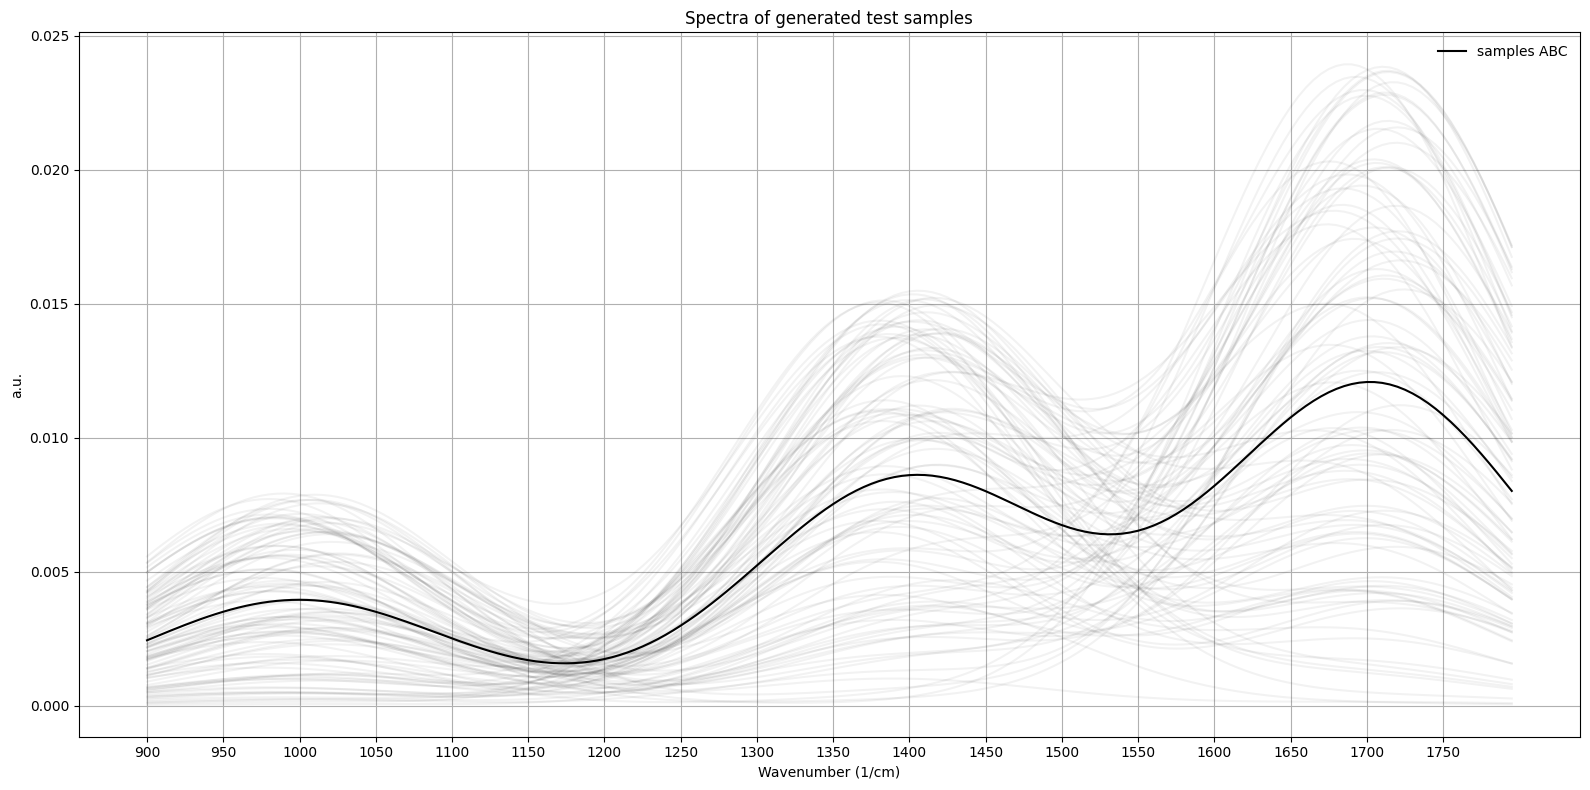

In [34]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
ABC_plot = pd.melt(ABC.reset_index(), ['Wavenumbers'])
for sample, measurement in ABC_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="black")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="black", label="samples ABC", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated test samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [35]:
df1=ABC.copy()

In [36]:
labels = pd.DataFrame(F).rename(columns={0:'A', 1:'B', 2:'C'})
labels.index = ['ABC_'+str(row+1) for row in labels.index]
labels

,A,B,C
ABC_1,1.454182,1.769594,0.093088
ABC_2,0.827097,1.304146,1.331447
ABC_3,0.871943,1.507559,1.471630
ABC_4,1.396856,1.523611,1.030958
ABC_5,1.910180,1.328055,1.434493
...,...,...,...
ABC_96,1.165712,0.439104,1.674976
ABC_97,1.508369,0.879502,1.677567
ABC_98,0.399670,1.888705,0.359325
ABC_99,1.746436,1.345148,0.793620


Now we have:

+ the single molecule spectra `df0` 
+ the mixed molecule spectra `df1`
+ `labels` with the mixing ratios of the mixed molecule spectra



### Next step: 
Find an ML model that determines the right molecular mixing ratios from the mixed molecule spectra. 

In [37]:
X_train = df0.copy().T
X_test = df1.copy().T
y_train=labels_train.copy()

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)


/home/karol/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
y_pred = model.predict_proba(X_test)

In [40]:
y_pred[2]

array([0.25348037, 0.32835968, 0.41815996])

In [41]:
indiv_heights = [df0.filter(like='A_').max().mean(), 
                 df0.filter(like='B_').max().mean(), 
                 df0.filter(like='C_').max().mean()]
indiv_heights = np.array(indiv_heights)

predicted_heights = y_pred[2]*indiv_heights

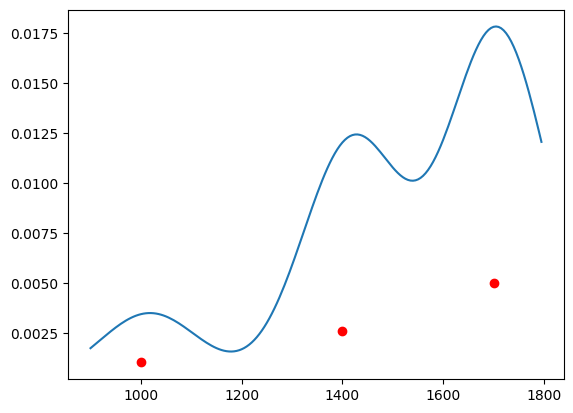

In [42]:
k = list(df0.index.unique())
plt.plot(k, np.array(X_test)[2])
plt.scatter([1000,1400,1700], predicted_heights, color='red')
plt.show()

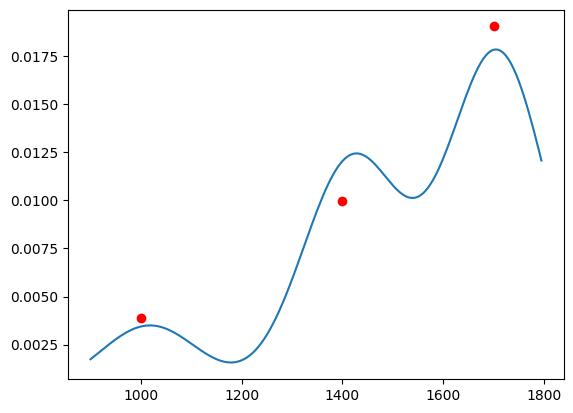

In [48]:
plt.plot(k, np.array(X_test)[2])
plt.scatter([1000,1400,1700], predicted_heights*3.8, color='red')
plt.show()

Logistic regression as actually a good start